### Identifying Fraud from the Enron Dataset

To prepare the project I worked in Jupyter Notebook and therefore I have hidden the code.

%%html
<style>
div.input {
    display:none;
}
</style>

written by Michaela Lueck 

The Enron Corporation was an American energy, commodities and services company based in Huston/Tx, USA. Enron employed about 29,000 staff with claimed revenues of nearly $101 billion during 2000.

In 2001 it was revealed that Enron's reported financial condition was sustained by institutionalized, systematic and creatively planned accounting fraud. This lead to the company's bancrupcy on Dec3 2001. This is know as the Enron Scandal (documentary on youtube: the smartest guys in the room). Legal investigations were raised, for example on an Insider Trading Scandal. Excecutives have sold their shares and the price of Enron began to decrese. Furthermore, Enron was responsible for the crisis of the California Engery market (which in fact lead to black-outs). Many shareholders and employees had enormous financial loss. 

During the legal investigation lots of data found the way into public, therefore the excercise of this project will be based on real data and a real question. This project can be seen as my personal investigation on the widespread corporate fraud. 

(source: Wikipedia) 

First I will investigate the data on characteristics, f.e. is a person a person of interest (POI), I will check on the features and the amount of data points. After an analyis of the data I will add a new feature to the data and do a scaling. And I will check if there are outliers or strange datapoints. Next step will be to work on an algorithmus (train and test). Validation and Evaluation will be shown, how good is the performance of the final algorithm choosen. 


A "Person Of Interest" is defined in the scope of this project as:

    someone who was indicted, or
    someone who settled without admitting guilt, or
    someone who testified in exchange for immunity.
    
I prepared this project with jupyter notebook for Pyhton 3 and therefore had to modify the given codes by Udacity a tiny bit. For example the print call needs parenthesis and the pickle files need to be open in read and write mode as otherwise an error message is thrown.     


In [1]:
import sys
import pickle
import pandas as pd 
sys.path.append("../tools/")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

pd.set_option('display.max_columns', None)

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#features_list = ['poi','salary', 'to_messages','deferral_payments','total_payments', 'loan_advances','bonus', 'email_adress', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses','from_poi_to_this_person', 'exercised_stock_options', 'from_messages','other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
# converting into a data frame for better investigation
df = pd.DataFrame.from_dict(data_dict, orient='index')



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Overview - Description of the Data

In [2]:
df.head()


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,13868,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,3486,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,56301,39,4046157,29,864523,0,False,NaN,465,1757552,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,11200,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,129142,NaN,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
loan_advances                146 non-null object
bonus                        146 non-null object
email_address                146 non-null object
restricted_stock_deferred    146 non-null object
deferred_income              146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
from_poi_to_this_person      146 non-null object
exercised_stock_options      146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
long_term_incentive          146 non-null object


The dataset is arrange as a dictionary (Key and Value pairs.)Keys are the names of the people and values are a dictionary which contains the variable information to that person. 

In [4]:
df.describe().transpose()

,count,unique,top,freq
salary,146,95,NaN,51
to_messages,146,87,NaN,60
deferral_payments,146,40,NaN,107
total_payments,146,126,NaN,21
loan_advances,146,5,NaN,142
bonus,146,42,NaN,64
email_address,146,112,NaN,35
restricted_stock_deferred,146,19,NaN,128
deferred_income,146,45,NaN,97
total_stock_value,146,125,NaN,20


First I am investigating on the data set. I see we have 146 rows in the data set, a row is related to a person. We have as types one boolean column and 20 object columns. There are columns which contain NaN values. From the documentation I learn that the NaN values for the financial data (payment and stock), the NaN represents a Null. This needs to be fixed. I do not want to drop the NaN values as this would make the data smaller and we know from machine learning that the quality of the machine learning model is proportional to the amount of data fed into it. 

In [5]:
print ("There are a total of {} people in the dataset." .format(len(df.index)))
print ("Out of which {} are POI and {} Non-POI." .format(df['poi'].value_counts()[True], 
                                                 df['poi'].value_counts()[False]))
print ("Total number of email plus financial features are {}. 'poi' column is our label."
.format(len(df.columns)-1))


There are a total of 146 people in the dataset.
Out of which 18 are POI and 128 Non-POI.
Total number of email plus financial features are 20. 'poi' column is our label.


In [6]:
financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 
'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 
'director_fees'] # (Units = USD) 

In [7]:
email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 
'from_this_person_to_poi', 'poi', 
'shared_receipt_with_poi'] # units = number of emails messages; except ‘email_address’, which is a text string

146 observations and 21 variables found in the  dataset - 6 email features, 14 financial features and 1 POI label - and they are divided between 18 POI’s and 128 non-POI’s.


In [8]:
df.index

Index(['ALLEN PHILLIP K', 'BADUM JAMES P', 'BANNANTINE JAMES M',
       'BAXTER JOHN C', 'BAY FRANKLIN R', 'BAZELIDES PHILIP J', 'BECK SALLY W',
       'BELDEN TIMOTHY N', 'BELFER ROBERT', 'BERBERIAN DAVID',
       ...
       'WASAFF GEORGE', 'WESTFAHL RICHARD K', 'WHALEY DAVID A',
       'WHALLEY LAWRENCE G', 'WHITE JR THOMAS E', 'WINOKUR JR. HERBERT S',
       'WODRASKA JOHN', 'WROBEL BRUCE', 'YEAGER F SCOTT', 'YEAP SOON'],
      dtype='object', length=146)

The index is the person's name

In [9]:
df.columns

Index(['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees'],
      dtype='object')

In [10]:
df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,13868,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,3486,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,56301,39,4046157,29,864523,0,False,NaN,465,1757552,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,11200,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,129142,NaN,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN


### Fixing  the NaN values 
The dataset contains some NaN values, which is not really surprisingly as we take the column director_fee, not all employees are directors. The NaN values need to be fixed.

In [11]:
# convert to numpy.nan
df.replace(to_replace='NaN', value=np.nan, inplace=True)

# count number of nan for columns
print (df.isnull().sum())


salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
loan_advances                142
bonus                         64
email_address                 35
restricted_stock_deferred    128
deferred_income               97
total_stock_value             20
expenses                      51
from_poi_to_this_person       60
exercised_stock_options       44
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
long_term_incentive           80
shared_receipt_with_poi       60
restricted_stock              36
director_fees                129
dtype: int64


Fixing the missing values, replacing NaN with 0 to enable caculation and display description.

In [12]:
# Nan value treatment 
df1 = df.replace(to_replace=np.nan, value=0, inplace = True)
df1= df.fillna(0).copy(deep=True)
df1.columns = list(df.columns.values)
#print (df1.isnull().sum())



I am dropping the row for 'THE TRAVEL AGENCY IN THE PARK'as this is no employee, but a Travel Agency, co-owned by Ken Lay's younger sister Sharon Lay. (source time magazine online)

In [13]:
# drop row for 'THE TRAVEL AGENCY IN THE PARK'
df2= df1.drop(['THE TRAVEL AGENCY IN THE PARK'])


I found one person which does not have any entries. Eugene Lockhart can be deleted as well from the dataset.


In [14]:
#print(df2.loc['LOCKHART EUGENE E'])

In [15]:
# drop row for 'LOCKHART EUGENE E'
df3= df2.drop(['LOCKHART EUGENE E'])
# drop column email address
df3= df3.drop(['email_address'], axis = 1)


I decided to drop the email column, as I think it is not needed for predictions. 

In [16]:
#correcting the negative entries 
df4 = df3.apply(lambda x: abs(x))

I discover negative entries for example in restricted_stock, this looks like an entry error to me. After consulting the pdf, insiderpay I cross checked for BHATNAGAR SANJAY and there is no negative entry, therefore I suspect it is typing error while transferring the data from the pdf into the dataset. This needs to be fixed, as I plan to use KBest for Feature Selection and this one does not like negative values (source: stackoverflow). 

In [17]:
df4.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,1.440000e+02,144.000000,1.440000e+02,144.000000,1.440000e+02,144.000000,1.440000e+02,1.440000e+02
mean,3.708921e+05,1238.555556,4.463145e+05,4.408533e+06,1.165625e+06,1.351995e+06,1.944818e+05,3.880783e+05,5.927825e+06,7.173088e+04,38.756944,4.240830e+06,363.583333,5.910482e+05,24.625000,6.739157e+05,702.611111,1.809726e+06,1.969224e+04
std,2.218503e+06,2237.564816,2.759703e+06,2.711763e+07,9.715621e+06,8.148887e+06,1.436647e+06,2.394389e+06,3.649266e+07,4.356503e+05,74.276769,2.624735e+07,1450.675239,3.707631e+06,79.778266,4.073499e+06,1077.290736,1.096799e+07,1.198616e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000,0.000000e+00,9.964825e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.563765e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,4.650125e+04,0.000000e+00
50%,2.112400e+05,347.500000,0.000000e+00,9.677950e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000e+00,9.805345e+05,2.193700e+04,4.000000,6.224980e+05,17.500000,9.595000e+02,0.000000,0.000000e+00,114.000000,3.643740e+05,0.000000e+00
75%,2.718015e+05,1623.000000,1.934200e+04,1.985668e+06,0.000000e+00,8.125000e+05,0.000000e+00,3.907200e+04,2.372703e+06,5.423450e+04,41.250000,1.735597e+06,53.000000,1.505075e+05,14.000000,3.753040e+05,933.750000,8.692200e+05,0.000000e+00
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,8.392500e+07,9.734362e+07,1.545629e+07,2.799289e+07,4.345095e+08,5.235198e+06,528.000000,3.117640e+08,14368.000000,4.266759e+07,609.000000,4.852193e+07,5521.000000,1.303223e+08,1.398517e+06


### Outliers

Task 2: Remove outliers

First step is to visualize salary and total payments.

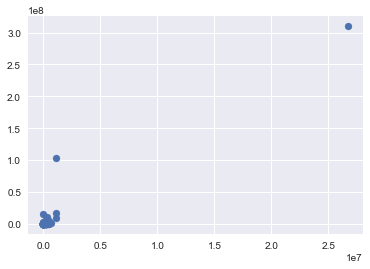

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df3['salary'], df3['total_payments'])
plt.show()

WOW it looks like as if there is a huge outlier. Who is it???

In [19]:
df4['salary'].idxmax()


'TOTAL'

It is the total, so I can drop that row. 

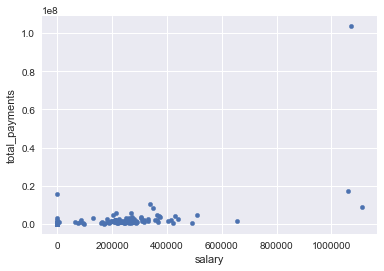

In [20]:
df4.drop('TOTAL', inplace = True)
df4.plot.scatter(x = 'salary', y = 'total_payments')

The remaining outliers are explained by the management/ persons of interest's payments, see Kenneth Lay.
After closer inspection I see not all of the Persons with high payment are POIs. Nevertheless, I think the data looks consistent and I do not want to count them as outliers whatcould theroretically be an idea. 

In [21]:
poi_pay = pd.DataFrame(df3[df3['poi']==True]['total_payments'])
print (poi_pay)

                      total_payments
BELDEN TIMOTHY N           5501630.0
BOWEN JR RAYMOND M         2669589.0
CALGER CHRISTOPHER F       1639297.0
CAUSEY RICHARD A           1868758.0
COLWELL WESLEY             1490344.0
DELAINEY DAVID W           4747979.0
FASTOW ANDREW S            2424083.0
GLISAN JR BEN F            1272284.0
HANNON KEVIN P              288682.0
HIRKO JOSEPH                 91093.0
KOENIG MARK E              1587421.0
KOPPER MICHAEL J           2652612.0
LAY KENNETH L            103559793.0
RICE KENNETH D              505050.0
RIEKER PAULA H             1099100.0
SHELBY REX                 2003885.0
SKILLING JEFFREY K         8682716.0
YEAGER F SCOTT              360300.0


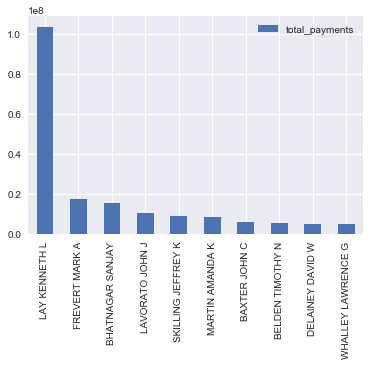

In [22]:
sorted_names =pd.DataFrame(df4['total_payments'])
sorted_names.sort_values(by =['total_payments'],axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
sorted_names.nlargest(10,['total_payments'], keep='first').plot(y='total_payments', kind='bar', legend=True)
plt.show()
#print(sorted_names.nlargest(10,['total_payments'], keep='first'))


We can see clearly that Kenneth Lay has an outstanding high amount of total payments. 

### Linear Regression
using it to predict a bonus :-), just an add- on as I was interested in the answer on how much bonus would I get for salary x. It is huge for a salary of 60,000 -> 166,400.98'$ In fact much, much more as my yearly income currently. 

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df4[['salary']], df4[['bonus']])

print("Intercept: " + str(model.intercept_))
print("Coef: " + str(model.coef_))

Intercept: [-78999.01870096]
Coef: [[ 4.06828741]]


#### predicted = intercept + coef * salary

In [24]:
#Predicted bonus for 60,000 salary
print(-78999.02 + 4.09 * 60000)

166400.97999999998


In [25]:
min_x = min(df4['salary'])
max_x = max(df4['salary'])

predicted = model.predict([[min_x], [max_x]])

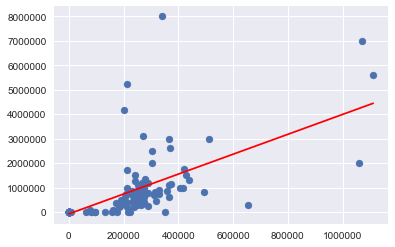

In [26]:
plt.scatter(df4['salary'], df4['bonus'])
plt.plot([min_x, max_x], predicted, color = "red")
plt.show()

### Task 3: Create new feature(s)

In [27]:
#conversion to dictionary 
my_dataset = df4.to_dict('index')


In [28]:
# Create new features 'salary_of_total_payment' and 'salary_of_total_stock_value'
df4['salary_of_total_payments'] = 0.0
df4['salary_of_total_stock_value'] = 0.0
df4.loc[df3['total_payments'] != 0.0,'salary_of_total_payments'] = df3['salary'] / df3['total_payments'] * 100
df4.loc[df3['total_stock_value'] != 0.0,'salary_of_total_stock_value'] = df3['salary'] / df3['total_stock_value'] * 100


I decided to make two new features on the ratio salary/totalpayment and on salary/totalstockvalue

In [29]:
#df4[df4['total_stock_value'].isnull()]

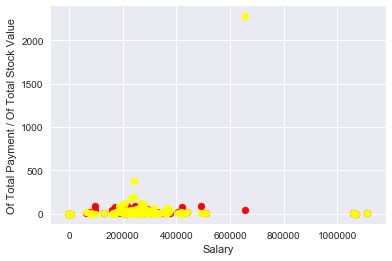

In [30]:
# Graph 'salary_of_total_payment' and 'salary_of_total_stock_value' to salary
plt.scatter(df4['salary'], df4['salary_of_total_payments'], color='red')
plt.scatter(df4['salary'], df4['salary_of_total_stock_value'], color='yellow')
plt.xlabel('Salary')
plt.ylabel('Of Total Payment / Of Total Stock Value')
plt.show()

Using the new feature for visualisation on the top 10 total payments.

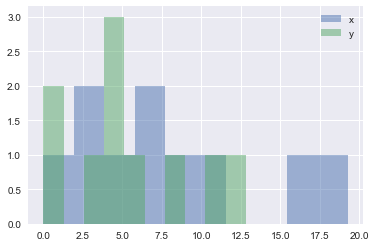

In [31]:
df5= (df4.nlargest(10,['total_payments'], keep='first'))
x = (df5[:]['salary_of_total_stock_value'])
y= (df5[:]['salary_of_total_payments'])

plt.hist(x, alpha=0.5, label='x')
plt.hist(y, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

After having checked the financial aspects, I want to turn to the email features. It would be interesting if there would be a pattern visible. Therefore I am constructing new email features. 

 r_from = from_this_person_to_poi / from_messages
 
 r_to = from_poi_to_this_person / to_messages

ratio of email sent or received from POI. It will reveal the persons with higher communication with POI (in percentage). I want to be sure no person with lower email volume is overseen. I suspect there could be email traffic even on those cases. 


In [32]:
df4.loc[df4['from_this_person_to_poi'] != 0.0,'f_from'] = df4['from_this_person_to_poi'] / df4['from_messages'] * 100
df4.loc[df4['from_poi_to_this_person'] != 0.0,'f_to'] = df4['from_poi_to_this_person'] / df4['to_messages'] * 100 
df4['f_from'].fillna(0, inplace=True)
df4['f_to'].fillna(0, inplace=True)
df4.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,salary_of_total_payments,salary_of_total_stock_value,f_from,f_to
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,0.0,4175000.0,126027.0,3081055.0,1729541.0,13868.0,47.0,1729541.0,2195.0,152.0,65.0,False,304805.0,1407.0,126027.0,0.0,4.503459,11.676797,2.961276,1.619573
BADUM JAMES P,0.0,0.0,178980.0,182466.0,0.0,0.0,0.0,0.0,257817.0,3486.0,0.0,257817.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
BANNANTINE JAMES M,477.0,566.0,0.0,916197.0,0.0,0.0,560222.0,5104.0,5243487.0,56301.0,39.0,4046157.0,29.0,864523.0,0.0,False,0.0,465.0,1757552.0,0.0,0.052063,0.009097,0.000000,6.890459
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0.0,1386055.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,False,1586055.0,0.0,3942714.0,0.0,4.740606,2.514313,0.000000,0.000000
BAY FRANKLIN R,239671.0,0.0,260455.0,827696.0,0.0,400000.0,82782.0,201641.0,63014.0,129142.0,0.0,0.0,0.0,69.0,0.0,False,0.0,0.0,145796.0,0.0,28.956404,380.345637,0.000000,0.000000


I discover here that we have persons which do not have any email address. Needs to be decided if they should be dropped or not. There are also persons with no salary in the list. 

I am starting with all features except email address 

In [33]:
#complete list of my features before feature selection 
features_list = ['poi','salary', 'to_messages','deferral_payments','total_payments', 'loan_advances','bonus',  'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses','from_poi_to_this_person', 'exercised_stock_options', 'from_messages','other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'salary_of_total_payments', 'salary_of_total_stock_value', 'f_from', 'f_to'] 


In [34]:
### Store to my_dataset for easy export below.
#my_dataset = data_dict
my_dataset=df4.to_dict('index')

In [35]:
## Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)                               
                           


### Feature Selection 

With the feature selection there is a good guideline: make everything as simple as possible, but not simpler. This means select the best features, add features if needed. On the other hand it may be needed to get rid of features due to noise, overfitting just to mention. 
My feature selection will be based on KBest method from scikit learn and on my intuition. 

In [36]:
predictors = features_list

First I am going to visualize on the different features to get a feeling for them. Which features will be the best to be selcted to identify the person of interest.
The first method I have choosen is SelectKBest.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in log10


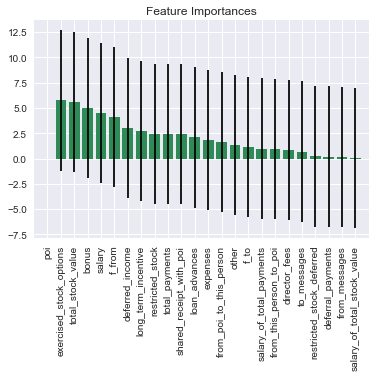

In [37]:
# Feature importances By SelectKBest

import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import KFold
%matplotlib inline
import matplotlib.pyplot as plt

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(df4[predictors],df4["poi"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])

# Plot the scores.  
plt.figure()
plt.title("Feature Importances")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=np.std([indices]), align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()


In contrary to my intuition it is not the mail features which seem to be important but more the financial ones. 
Next method I am going to use for the feature selection is the Variance Threshold. 

In [38]:
#complete list of my features before feature selection 
features_list = ['poi','salary', 'to_messages','deferral_payments','total_payments', 'loan_advances','bonus',  'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses','from_poi_to_this_person', 'exercised_stock_options', 'from_messages','other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'salary_of_total_payments', 'salary_of_total_stock_value', 'f_from', 'f_to'] 


In [39]:
from sklearn.feature_selection import VarianceThreshold

#Use Variance Threshold to select features with the highest variance

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(df4)
indices = sel.get_support()

discarded = []
for i in range(0, len(indices)):
    if indices[i] == False:
        discarded.append(list(df4.columns.values)[i])

In [40]:
discarded

['poi']

The third method applied for feature selection is based on the Decision Tree Classifier and the feature importance function 

In [41]:
### deploying feature selection
from sklearn import cross_validation
from time import time
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print ('accuracy before tuning ', score)

print ("Decision tree algorithm time:", round(time()-t0, 3), "s")


accuracy before tuning  0.914893617021
Decision tree algorithm time: 0.0 s


In [42]:
importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print ('Feature Ranking: ')
for i in range(7):
    print ("{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]]))



Feature Ranking: 
1 feature salary (0.40500463392029673)
2 feature to_messages (0.161765944898475)
3 feature deferral_payments (0.1370898980537534)
4 feature total_payments (0.10676552363299349)
5 feature loan_advances (0.08542844976579936)
6 feature bonus (0.06066222933692811)
7 feature restricted_stock_deferred (0.043283320391753984)


For the automatic choice selection I have prepared the K_best visualisation, the variance and the importance calculation as shown above. 

I see that features dealing with mail and features dealing with ratio do have a relatively low variance. This is clearly shown in the additional features I have constructed.

As the task in this project is to indentify the so called persons of interest, I think a pure automatic choice may mot be the best. My  selection is based on the automatic choice plus human intuition. 

Salary, bonus and expenses are clearly in the automatic choice, but I wanted also to include email features as they potentially can be an indicator as well. Interesting is that the financial features seem to be more relevant than the email features. 



I am dropping the persons witht 0 value in salary_of_total_payments as I suspect there will be not a big chance to find a poi without payment. 

In [43]:
# Get names of indexes for which column salary of total payments is 0
indexNames = df4[ df4['salary_of_total_payments'] == 0.0 ].index
 
    
    
    
# Delete these row indexes from dataFrame
df4.drop(indexNames , inplace=True)

In [44]:
df_final= df4[['poi', 'salary', 'bonus','expenses', 'from_poi_to_this_person', 'from_this_person_to_poi', 'salary_of_total_payments','f_from', 'f_to']]
df_final.head()


,poi,salary,bonus,expenses,from_poi_to_this_person,from_this_person_to_poi,salary_of_total_payments,f_from,f_to
ALLEN PHILLIP K,False,201955.0,4175000.0,13868.0,47.0,65.0,4.503459,2.961276,1.619573
BANNANTINE JAMES M,False,477.0,0.0,56301.0,39.0,0.0,0.052063,0.000000,6.890459
BAXTER JOHN C,False,267102.0,1200000.0,11200.0,0.0,0.0,4.740606,0.000000,0.000000
BAY FRANKLIN R,False,239671.0,400000.0,129142.0,0.0,0.0,28.956404,0.000000,0.000000
BAZELIDES PHILIP J,False,80818.0,0.0,0.0,0.0,0.0,9.395956,0.000000,0.000000


### Visualisation on salary and bonus 

In [45]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df_final[["salary", "bonus"]].values

y = df_final["poi"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.4)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.763157894737


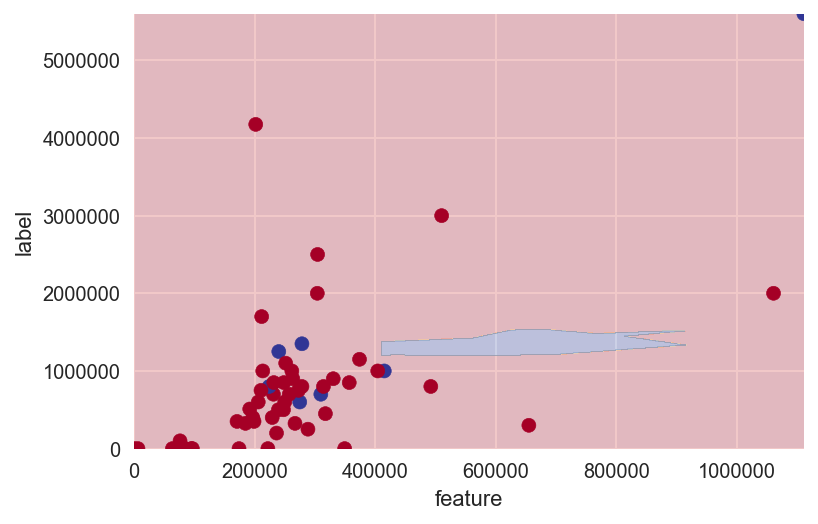

In [47]:
from helper import plot_classifier

# test data plot
plot_classifier(model, X_train, y_train, proba = False, xlabel = "feature", ylabel = "label")

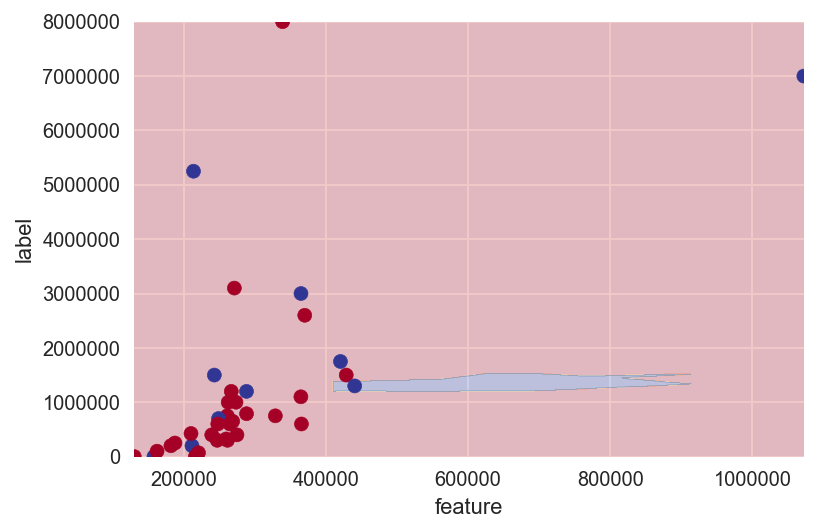

In [48]:
# test data plot
plot_classifier(model, X_test, y_test, proba = False, xlabel = "feature", ylabel = "label")

### Task 4: Try a varity of classifiers
Please name your classifier clf for easy export 
Note that if you want to do PCA or other multi-stage operations,
you'll need to use Pipelines. For more info:
http://scikit-learn.org/stable/modules/pipeline.html

   


In [49]:
import os
os.chdir("./")
import feature_format

In [50]:
my_dataset = df_final.to_dict('index')
features_list =['poi', 'salary', 'bonus', 'from_poi_to_this_person', 'from_this_person_to_poi', 'salary_of_total_payments','f_from', 'f_to'] 

In [51]:
data = feature_format.featureFormat (my_dataset, features_list, sort_keys = True)

In [52]:
## Extract features and labels from dataset for local testing
labels, features= feature_format.targetFeatureSplit (data)

In [53]:
#which columns shall be used for prediciton 
X =features
y =labels

In [54]:
# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


In [55]:
X_train = features_train 
X_test = features_test
y_train = labels_train 
y_test = labels_test

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

I have scaled the data to have a better comparison. 
Starting point is the Gaussian Naive Bayes as adviced in the starter code. 

In [58]:
#features_test = scaler.transform(features_test)

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf = GaussianNB()
clf.fit(X_train, y_train)

print("Gaussian score:", clf.score(X_test, y_test))

Gaussian score: 0.689655172414


In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

print("KNN score:", clf.score(X_test, y_test))

KNN score: 0.758620689655


The score of the KNeighboursClassifier is with 0.75 better than the Gaussian Naive Bayes with 0.69. After playing around with other classifiers I will tune the KNN. 

### Comparison of different models 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clfs = {
    "logistic regression": LogisticRegression(),
    "svc": SVC(),
    "neural network": MLPClassifier(),
    "decision tree": DecisionTreeClassifier(),
    "random forest": RandomForestClassifier(),
    "gradient boosting": GradientBoostingClassifier()
}

for key, clf in clfs.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(key + ": " + str(score))

logistic regression: 0.793103448276
svc: 0.758620689655
neural network: 0.793103448276
decision tree: 0.724137931034
random forest: 0.758620689655
gradient boosting: 0.586206896552


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


### Task 5: Tune your classifier to achieve better than .3 

With the results shown above, I decide I will use the KNN as here the result shows there might be room for improvement which can be done with tuning. 

In [61]:
from sklearn.model_selection import train_test_split
X =features
y =labels

X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state = 0)

#### as recomended I add the Stratified Shuffle Split 

In [85]:
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array(features)
y = np.array(labels)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

#print(sss)       

for train_index, test_index in sss.split(X, y):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]


TRAIN: [22 38 53  3  2 52 91 41 32 66 60 89 43 57 34 15 64 51 28 50 68  6 75 29  7
 23 37 56 71 76  8 49 11 69 47 86 33 77 67 35 62 74 87 85  4 61 13] TEST: [ 5 92 19 45 36 18 83 31 27 42 39 90 40 82 25 48 84 58 20 88 26  9 30 59 81
  1 12  0 44 78 63 17 73 46 79 14 21 65 80 10 93 72 54 16 70 24 55]
TRAIN: [78 48 93 89 41 75 11 20 27  0 33 19 16 67 39 23  9 53  8 88 10 77 43 32 73
 74  4 82 45 58 79 61 71  7 21 70 76 83 62 37 63 22 86 72 60 81 57] TEST: [12 40 42 80  2 35 66 51 69 87 13 30 64 24 50 46 55 56 15 52 44 85 47  6 34
 18 59 65  5 90 31 38 25 29 28 17 84 92 49  3 68  1 91 36 54 26 14]
TRAIN: [43  1 80 12 67 19 74 77 27 51 78 10 64 35 79  0 38 49 25 22 89 42 75  3 52
 88 14 40 24 50 46  5 41 92 54 83 13 15 58 63 69 39 90 62 36 33 34] TEST: [60  6 87 86 56 37 93 30 28 84  8 59  2 26 48 44 31 85 55 72 18 57 23  9 68
 32 47 66 45 81 91 17 70  7 53 76 21 82 65 20 16 61  4 11 73 71 29]
TRAIN: [24 33 87  9 48 13 61 19 80 74 84 59 23  6 37  4 56 70 73 36 88 15 52  8 31
  1 57 76 51 4

In [86]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# pipeline.set_params(knn__n_neighbors = 1)

In [87]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    "knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})
clf.fit(X_train, y_train)

print("the best parameter choice is:", clf.best_params_)

the best parameter choice is: {'knn__n_neighbors': 2}


In [88]:
print("score:",clf.score(X_validation, y_validation))

score: 0.791666666667


In [89]:
print ("the best score is: ")
print(clf.best_score_)

the best score is: 
0.829787234043


#### The best neighbor now after applying stratified shuffle split is 2 and the best score is 0.83 now

##### As it is recommended in the first review I show parameter tuning as example additionally to the tuning code above: 

In [67]:
my_dataset
X =features
y =labels


In [68]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("KNN score:", clf.score(X_test, y_test))


KNN score: 0.808510638298


In [69]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

print("KNN score:", clf.score(X_test, y_test))

KNN score: 0.829787234043


In [70]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

print("KNN score:", clf.score(X_test, y_test))

KNN score: 0.808510638298


In [71]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)

print("KNN score:", clf.score(X_test, y_test))

KNN score: 0.765957446809


The scores are differing depending on the neighbors = 3 -0.71, 5 -0.75 and 7-0.79 whereas 9 delivers 0.75 again. 7 is the best choice as the automatic code delivered it. 

### the scores are different after applying the stratified shuffle split
these are now: 3-0.8, 5´-0,82 , 7-0.81 and 9- 0,76

Testing the scores for KNN

In [72]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


In [73]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
from time import time
t1 = time()

pred = clf.predict(features_test)
print ("Testing time:", round(time()-t1,3),"s")

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(labels_test,pred)

print("Accuracy is equal to %0.4F %%" % (accuracy*100))
print("Precision is : ",precision_score(pred, labels_test))
print ("Recall is    : ",recall_score(pred, labels_test))
print ("f1-score is  : ",f1_score(pred, labels_test))


Testing time: 0.0 s
Accuracy is equal to 86.2069 %
Precision is :  0.571428571429
Recall is    :  0.8
f1-score is  :  0.666666666667


The KnearestNeighbour classifier is improving from 0.75 up to the best possible score of 0.86.

### Validation and it's importance

For the validation I am looking at the Score, the Precision and the recall of my selected classifier. The likelyhood that a person is a poi is the precision and the recall measures if it is likely that the identifier will be flagged as poi. 

Validation is done to estimate the performance on independent dataset and serves as check on overfitting.  
With performing the validation we can be sure if our classifier works well (or not). We get a feeling about the performance of the classifier. If the validation shows bad results, it is a sign to go back to either feature selection, parameter tuning or choosing another classifier. 

In [74]:
from sklearn.model_selection import train_test_split
X =features
y =labels

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)

print("the score is:", clf.score(X_test, y_test))

the score is: 0.791666666667


In [76]:
y_test_pred = clf.predict(X_test)

In [77]:
from sklearn.metrics import precision_score, recall_score

print("precision:", precision_score(y_test, y_test_pred))
print("recall:", recall_score(y_test, y_test_pred))

precision: 0.666666666667
recall: 0.333333333333


Precision is the number of correct positive classifications divided by the total number of positive labels assigned. In other words, it is the fraction of persons of interest predicted by the algorithm that are truly persons of interest.
Recall is the number of correct positive classifications divided by the number of positive instances that should have been identified. In other words, it is the fraction of the total number of persons of interest in the data that the classifier identifies. 

As a second tool for the validation I am using the confusion matrix which evaluates the accuracy of my classification. With having uses both methods complementary I can be sure my classifier is working well and I did not over- / underfit it.  

A confusion matrix is a matrix (table) that can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.  The name confusion matrix reflects the fact that it makes it easy for us to see what kind of confusions occur in our classification algorithms. (source: www.python-course.eu)

## Format  `confusion_matrix`:

|Modell: False | Modell: True
--------------------|-
**reality: FALSE** | True negativ | False positiv
**reality: TRUE** | False negativ | True positiv

In [78]:
y_test_pred = clf.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix(y_test, y_test_pred)

array([[17,  1],
       [ 4,  2]])

### Conclusion

This was an expierience, the part for the data describing was now very comfortable and the investigation on the data set and the background was really fun. 
The feature selection seemed for me to be done better by intuition than by a technique as it turns out as if the salary and bonus (from the financial features) are the ones which identify a poi better than the email features. What was surprising for me is that some classifier deliver the same scores.

The dataset contains only 146 entries which is normally a small amount to be used for predicitons, the more input data the better the prediction can be if the methods shown here are correctly applied. 

For the validiation part I decided to use the confusion matrix, it delivers the overview about the comparison of the prediction with false true and true false. Validation is important as we need to know how good our classifier is working. 

I have one additional comment on the parameter tuning. It needs to be carefully applied as we could overfit.Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

Addtitionally I want to remark, I did not touch the possibility of identifying the emails themselves. They could be used to predict if a person has written an email.


In [81]:
###  precision and recall using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# import test_classifier and run the function
from tester import test_classifier

test_classifier(clf, my_dataset, features_list)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
	Accuracy: 0.80460	Precision: 0.53194	Recall: 0.19150	F1: 0.28162	F2: 0.21961
	Total predictions: 10000	True positives:  383	False positives:  337	False negatives: 1617	True negatives: 7663



Using the tester I get for the precision (probability of a given prediction to be true)0.5 which is more than 0.3 and for the accuracy 0.8 (the precentage of correct predictions). 

### Task 6: Dump your classifier, dataset, and features_list so anyone can check your results


In [82]:
from tester import dump_classifier_and_data


In [83]:
### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "wb") )
pickle.dump(data_dict, open("my_dataset.pkl", "wb") )
pickle.dump(features_list, open("my_feature_list.pkl", "wb") )


In [84]:
features_list

['poi',
 'salary',
 'bonus',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'salary_of_total_payments',
 'f_from',
 'f_to']

In [85]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

### Final remark

I experimented a lot with different classifier. My final decision was to KNN as it delivered the best result. But I noticiced while experimenting that the results can differ regarding training and test set used. 
Finally I hope everything is matching the expectations.
Recources I used: Udemy, Data Camp, Stack Overflow, Google, Scikitlearn documentation and Udacity code. 